### VDJ recombination statistics

In [1]:
import os
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from Bio import SeqIO
from antpack import SingleChainAnnotator, SequenceScoringTool

aligner = SingleChainAnnotator(chains=["H", "K", "L"], scheme = "imgt")

if "notebooks" in os.getcwd():
    current_dir = os.path.join(os.getcwd(), "..", "..")

score_tool = SequenceScoringTool()

os.chdir(current_dir)
    
if "train_test_data_immunogenicity_0.0.2" not in os.getcwd():
    os.chdir(os.path.join(current_dir, "train_test_data_immunogenicity_0.0.2", "cAb-rep"))

In [22]:
heavy = pd.read_csv("heavy_cab_vdj_assigned.csv.gz")
heavy = heavy.loc[~heavy.SAM_cluster_weighted.isna(),:]
heavy = heavy.loc[~heavy.d_gene.isna(),:]
#light = pd.read_csv("light_cab_vdj_assigned.csv.gz")

/tmp/ipykernel_1004994/2799602599.py:1: DtypeWarning: Columns (29,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  heavy = pd.read_csv("heavy_cab_vdj_assigned.csv.gz")


In [25]:
heavy.columns

Index(['sequence_id', 'sequence_aa', 'rev_comp', 'v_call', 'v_gene', 'v_score',
       'v_identity', 'v_identity_aa', 'd_call', 'd_gene', 'd_score', 'j_call',
       'j_gene', 'j_score', 'j_identity', 'j_identity_aa', 'c_call',
       'cdr3_length', 'fwr1_aa', 'fwr2_aa', 'fwr3_aa', 'fwr4_aa', 'cdr1_aa',
       'cdr2_aa', 'cdr3_aa', 'v_mutations_aa', 'v_mutation_count',
       'v_mutation_count_aa', 'v_insertions', 'v_deletions', 'junction',
       'junction_aa', 'junction_in_frame', 'junction_v', 'junction_d',
       'junction_j', 'junction_n', 'junction_n1', 'junction_n2',
       'junction_v_aa', 'junction_d_aa', 'junction_j_aa', 'junction_n_aa',
       'junction_n1_aa', 'junction_n2_aa', 'junction_germ_v',
       'junction_germ_d', 'junction_germ_j', 'junction_germ_v_aa',
       'junction_germ_d_aa', 'junction_germ_j_aa', 'isotype', 'locus',
       'v_cigar', 'd_cigar', 'j_cigar', 'germline_database',
       'SAM_cluster_weighted'],
      dtype='object')

<AxesSubplot: ylabel='v_score'>

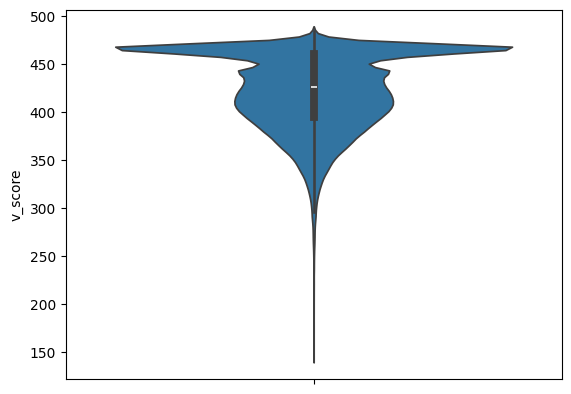

In [27]:
sns.violinplot(heavy.v_score)

In [23]:
heavy.d_gene.unique()

array(['IGHD2-2', 'IGHD1-26', 'IGHD3-10', 'IGHD3-3', 'IGHD2-8',
       'IGHD3-22', 'IGHD6-19', 'IGHD6-6', 'IGHD3-16', 'IGHD2-15',
       'IGHD1-14', 'IGHD5-5', 'IGHD7-27', 'IGHD1-1', 'IGHD6-13',
       'IGHD4-17', 'IGHD5-12', 'IGHD1-7', 'IGHD5-24', 'IGHD3-9',
       'IGHD4-23', 'IGHD5-18', 'IGHD2-21', 'IGHD1-20', 'IGHD4-11',
       'IGHD6-25'], dtype=object)

In [30]:
from sklearn.metrics.cluster import normalized_mutual_info_score

idx = heavy.v_score.values > 450

normalized_mutual_info_score(heavy.v_gene[idx], heavy.SAM_cluster_weighted[idx])

0.7884664130415193

In [13]:
heavy.sequence_aa[46115]

'QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSISTAYMELSRLRSDDTAVYYCARDGTVLL***NVCF*YLGPRDNGHRLF'

/tmp/ipykernel_924175/2678435963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sb)


<AxesSubplot: ylabel='Density'>

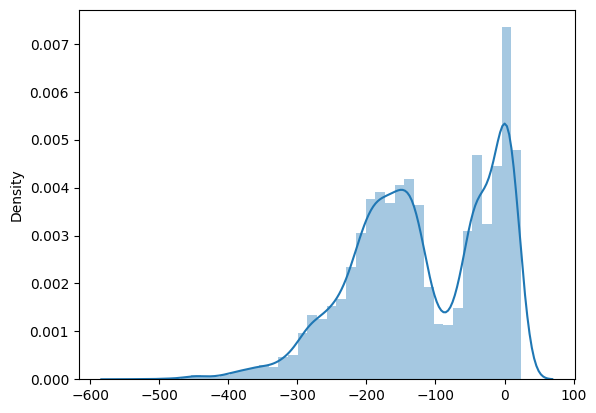

In [13]:
sns.distplot(sb)

In [67]:
1752/25000

0.07008

In [55]:
dc_dict = {}
all = set()
for s, vcall in zip(sb.tolist(), raw.j_call):
    if s not in dc_dict:
        dc_dict[s] = set()
    dc_dict[s].add(vcall.split("-")[0].split("/")[0])
    all.add(vcall.split("-")[0].split("/")[0])

In [57]:
dc_dict

{1222.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 642.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 1276.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 506.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 592.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 537.0: {'IGKJ5'},
 1249.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 799.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 1223.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 487.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 1278.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 791.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 162.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 366.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 730.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 194.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 189.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 1250.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGKJ4', 'IGKJ5'},
 992.0: {'IGKJ1', 'IGKJ2', 'IGKJ3', 'IGK

In [18]:
wow=score_tool.models["human"]["H"].mu_mix[1606,...]
wowmix = wow.copy()
#wowmix[wowmix<0.01]=0

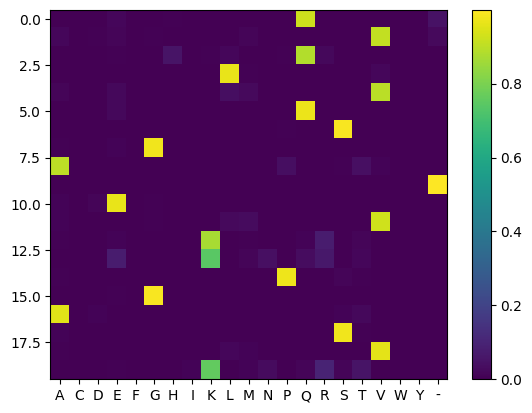

In [19]:
plt.imshow(wowmix[:20,...], aspect="auto")
plt.xticks(np.arange(21), score_tool.aa_list)
plt.colorbar()

In [43]:
np.argsort(score_tool.models["human"]["H"].mix_weights)[-110:].tolist().index(1606)

6